<a href="https://colab.research.google.com/github/jh941213/NLP/blob/main/07_%E1%84%8B%E1%85%A9%E1%84%83%E1%85%B5%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%80%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%86%AB%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_%E1%84%8B%E1%85%A1%E1%86%A8%E1%84%80%E1%85%B5(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools 
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav



In [ ]:
!pip install -U --no-cache-dir gdown --pre

In [ ]:
!gdown --id 1r703a_qF7sbPfHnKCJqASi-zc81aZTtd

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1r703a_qF7sbPfHnKCJqASi-zc81aZTtd
To: /content/GeneralMidi.wav
100% 3.41G/3.41G [00:23<00:00, 143MB/s]


In [ ]:
midi_file = '/content/GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
np.random.seed(7)
instruments = np.random.randint(0, 100, 10)
instruments

array([47, 68, 25, 67, 83, 23, 92, 57, 14, 23])

- librasa load : https://librosa.org/doc/main/generated/librosa.load.html 

    - Load an audio file as a floating point time series.
    - input : librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    - output : y(audio time series), sr(sample rate)


In [ ]:
num_notes = 50
sec = 2

audio = []
inst = [] 

for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
    
    # 악기 인덱스
    instrument = instruments[inst_idx]

    # sound 시작 지점 
    offset = (instrument*num_notes*sec) + (note*sec)  # 악기 소리 시작 지점 + Note 시작 지점 
    print("instrument : {}, note:{}, offset:{}".format(instrument, note, offset))

    # librosa load 
    y, sr = librosa.load(midi_file, sr = None, offset = offset, duration =2.0)

    audio.append(y)
    inst.append(inst_idx)

instrument : 47, note:0, offset:4700
instrument : 47, note:1, offset:4702
instrument : 47, note:2, offset:4704
instrument : 47, note:3, offset:4706
instrument : 47, note:4, offset:4708
instrument : 47, note:5, offset:4710
instrument : 47, note:6, offset:4712
instrument : 47, note:7, offset:4714
instrument : 47, note:8, offset:4716
instrument : 47, note:9, offset:4718
instrument : 47, note:10, offset:4720
instrument : 47, note:11, offset:4722
instrument : 47, note:12, offset:4724
instrument : 47, note:13, offset:4726
instrument : 47, note:14, offset:4728
instrument : 47, note:15, offset:4730
instrument : 47, note:16, offset:4732
instrument : 47, note:17, offset:4734
instrument : 47, note:18, offset:4736
instrument : 47, note:19, offset:4738
instrument : 47, note:20, offset:4740
instrument : 47, note:21, offset:4742
instrument : 47, note:22, offset:4744
instrument : 47, note:23, offset:4746
instrument : 47, note:24, offset:4748
instrument : 47, note:25, offset:4750
instrument : 47, note:

In [ ]:
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)


#  10개의 악기*50개의 음계
print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


In [ ]:
audio_np[0], inst_np[0]

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 0)

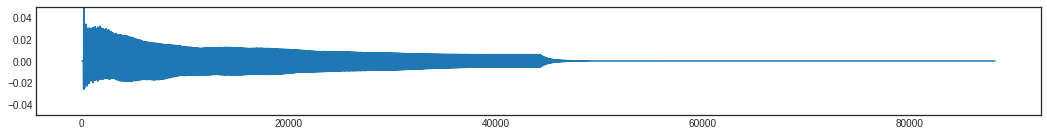

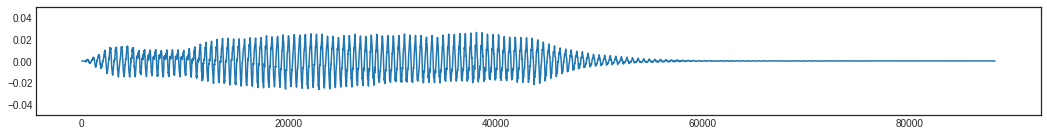

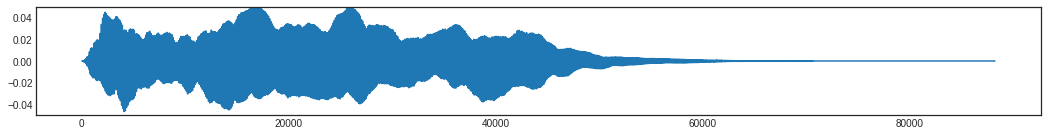

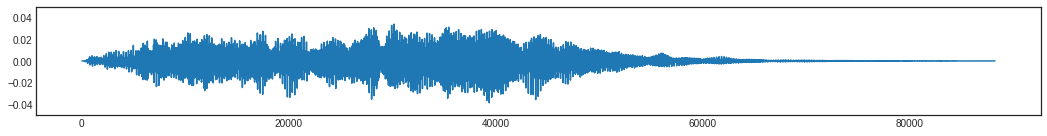

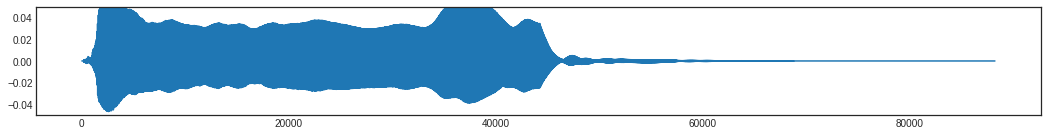

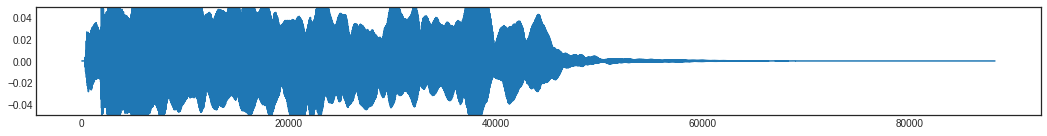

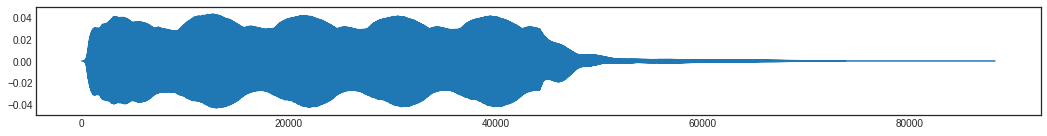

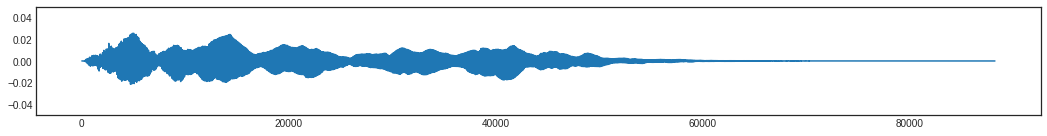

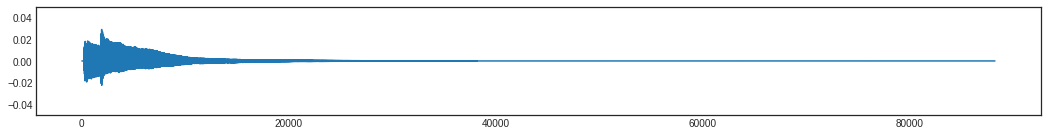

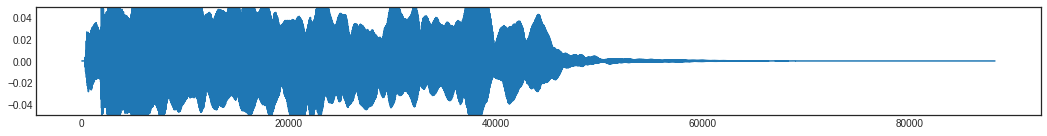

In [ ]:
for idx in range(0, len(audio_np), num_notes):
    plt.figure(figsize=(18, 2))
    plt.plot(audio_np[idx])
    plt.ylim(-0.05, 0.05)
    plt.show()

In [ ]:
# sampling rate
sr

44100

In [ ]:
print(inst_np[0]) 
ipd.Audio(audio_np[0], rate=sr)

0


In [ ]:
print(inst_np[50]) 
ipd.Audio(audio_np[50], rate=sr)

1


In [ ]:
print(inst_np[100]) 
ipd.Audio(audio_np[100], rate=sr)

2


In [ ]:
print(inst_np[150]) 
ipd.Audio(audio_np[150], rate=sr)

3


In [ ]:
print(inst_np[200]) 
ipd.Audio(audio_np[200], rate=sr)

4


In [ ]:
print(inst_np[-1]) 
ipd.Audio(audio_np[-1], rate=sr)

9


### 스케일링

librosa 패키지는 함수의 입력으로 -1 ~ 1 사이의 데이터를 처리하기 때문에 스케일링이 필요함

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(audio_np)

array([[0.5555556 , 0.625     , 0.5555556 , ..., 0.71428573, 0.625     ,
        0.5555556 ],
       [0.5555556 , 0.625     , 0.5555556 , ..., 0.42857143, 0.375     ,
        0.33333337],
       [0.33333337, 0.375     , 0.33333337, ..., 0.42857143, 0.375     ,
        0.33333337],
       ...,
       [0.33333337, 0.375     , 0.33333337, ..., 0.42857143, 0.375     ,
        0.33333337],
       [0.33333337, 0.375     , 0.33333337, ..., 0.5714286 , 0.5       ,
        0.44444448],
       [0.5555556 , 0.625     , 0.5555556 , ..., 0.42857143, 0.375     ,
        0.33333337]], dtype=float32)

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 88200)
(100, 88200)
(400,)
(100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)


acc = accuracy_score(pred, test_y)
acc

0.05

### Support Vector Machine

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

RC = RandomForestClassifier()
RC.fit(train_x, train_y)

pred = RC.predict(test_x) 
acc = accuracy_score(pred, test_y)
print(acc)

0.53


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)

pred = DT.predict(test_x) 
acc = accuracy_score(pred, test_y)
print(acc)

0.29


왜 이런 결과가 나올까요? 

## Spectrogram

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음

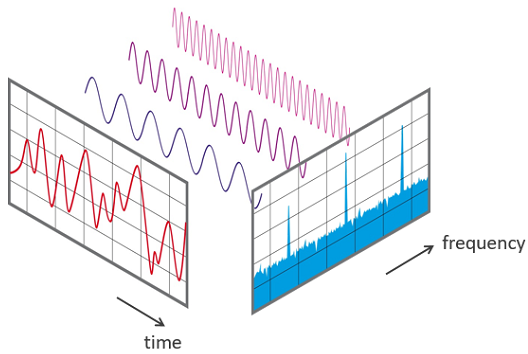

http://librosa.org/doc/main/generated/librosa.stft.html

- window의 크기(n_fft)
- window 간에 겹치는 사이즈(hop_length)

STFT의 단순히 magnitude 부분을 취해서 db스케일로만 변환해주면 spectrogram이 된다. 

즉, stft은 복소수로 리턴되므로 np.abs를 이용해서 amplitude로 바꿔준다.   
librosa.amplitude_to_db()를 이용해 stft을 dB 스케일로 바꿔주면 스펙트로그램이 된다. 

In [ ]:
librosa.stft(train_x[0], win_length = 258)

In [ ]:
import librosa 

def wav2spec(wav, fft_size = 258): #spectrogram shape를 맞추기 위해 size 변형
    D = np.abs(librosa.stft(wav, n_fft=fft_size)) # n_fft : length of the windowed signal 
    # output : (1 + n_fft/2, t) 
    return D

- FFT는 대칭으로 나오기 때문에 절반만 사용

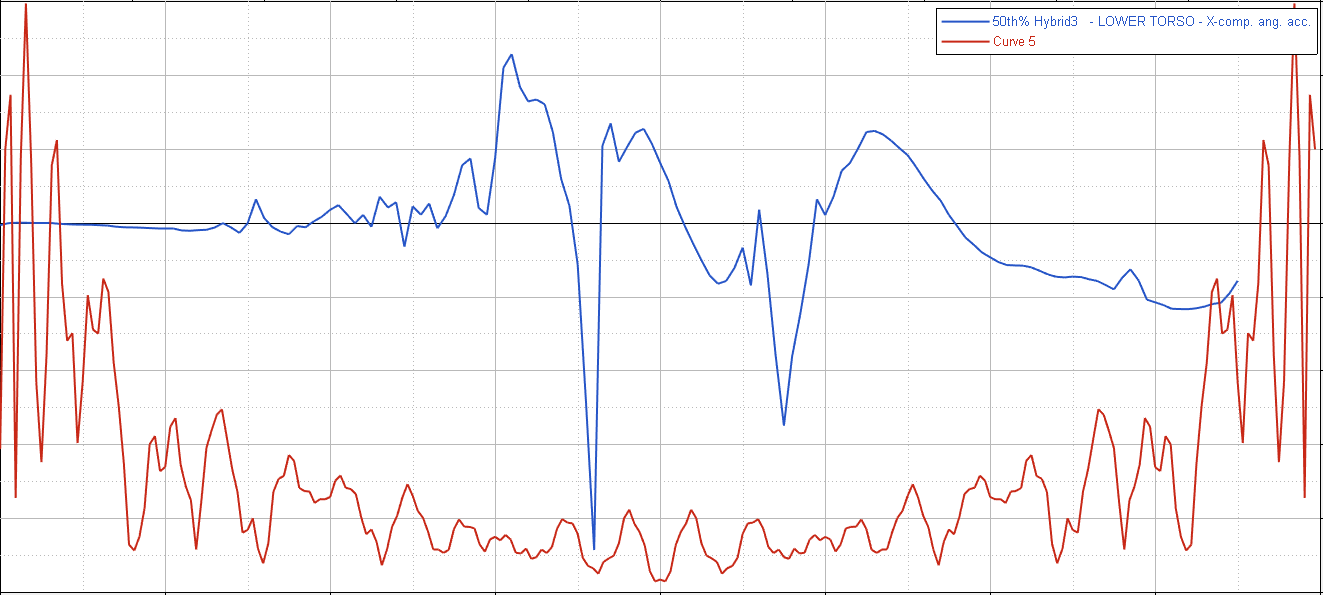

In [ ]:
spectrogram = wav2spec(audio[0])
print("Waveform shape : ", audio_np[0].shape) 
print("Spectrogram shape : ", spectrogram.shape) # (1 + n_fft/2, t) -> 즉 주파수 bin, frame number

Waveform shape :  (88200,)
Spectrogram shape :  (130, 1379)


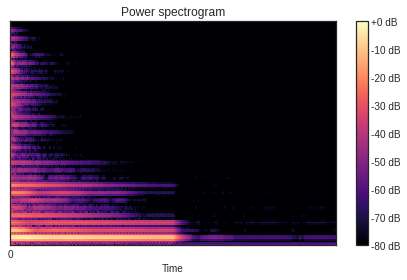

In [ ]:
# 위에서 뽑은 1차원데이터를 2차원데이터로 변형
import librosa.display

librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()

In [ ]:
audio_spec = []
for a in audio : 
    audio_spec.append(wav2spec(a))    

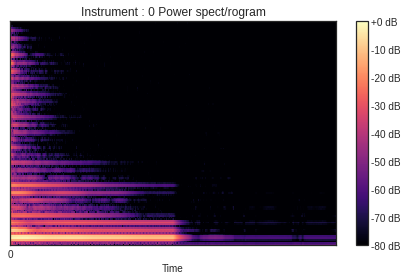

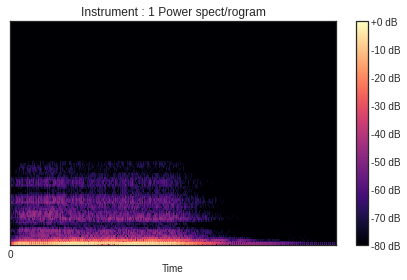

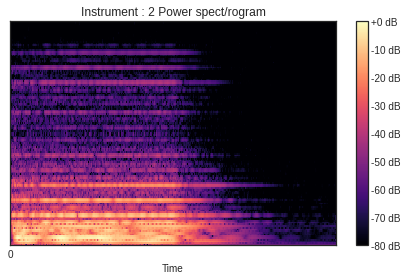

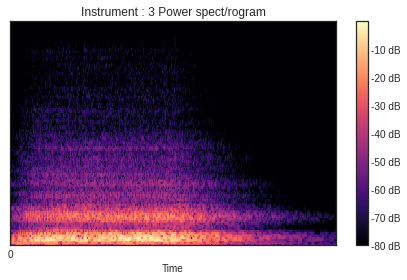

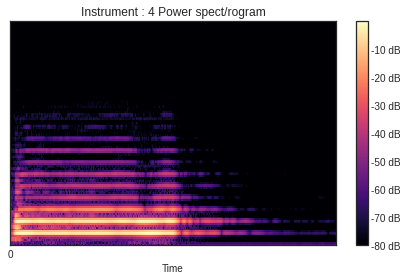

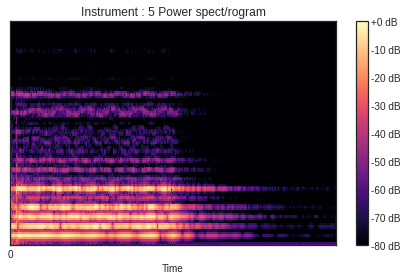

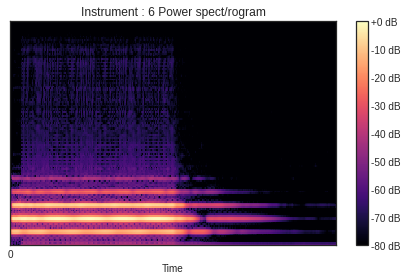

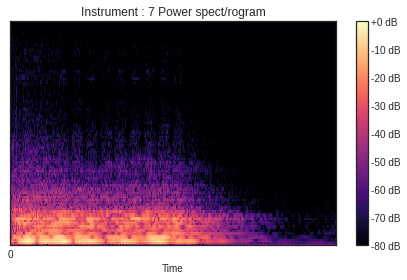

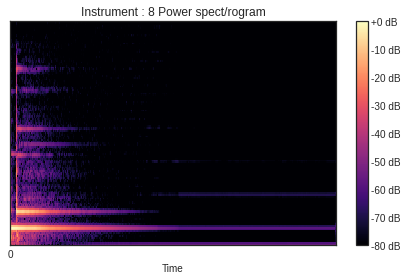

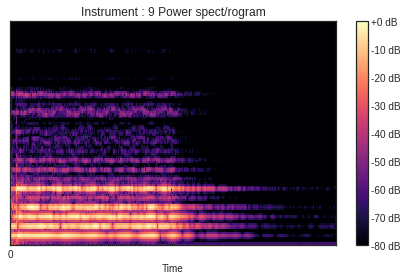

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(audio_spec[i], ref = np.max)
    librosa.display.specshow(amp_db, x_axis='time')
    plt.title(f'Instrument : {inst[i]} Power spect/rogram')
    plt.colorbar(format='%+2.0f dB')
    plt.xticks(range(0, 1))
    plt.tight_layout()
    plt.show()

In [ ]:
# numpy로 변환 
spec_np = np.array(audio_spec, np.float32)
inst_np = np.array(inst, np.int16)

print(spec_np.shape, inst_np.shape)

(500, 130, 1379) (500,)


분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환

In [ ]:
spec_np = spec_np.reshape(500, -1)
spec_np.shape

(500, 179270)

- 스케일링을 통해 데이터 범위 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit_transform(spec_np)

array([[4.2213708e-01, 5.1652354e-01, 7.0705014e-01, ..., 2.4796387e-02,
        1.3921459e-01, 1.0741232e-01],
       [3.9444399e-01, 6.2015176e-01, 8.2240444e-01, ..., 5.9333146e-02,
        1.8328561e-01, 1.6671510e-01],
       [4.1587624e-01, 3.7392586e-01, 9.7776204e-01, ..., 3.0342255e-02,
        2.6276302e-02, 1.3820307e-01],
       ...,
       [3.4299529e-01, 3.3157729e-02, 5.5556027e-03, ..., 1.5150598e-01,
        1.6775258e-01, 8.4311850e-02],
       [3.4877360e-01, 3.2827344e-02, 5.1808688e-03, ..., 1.2550679e-04,
        7.7340104e-02, 9.7746842e-02],
       [3.1645167e-01, 3.3302169e-02, 4.8583690e-03, ..., 5.6545548e-03,
        1.3192286e-01, 8.4096201e-02]], dtype=float32)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(spec_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 179270)
(100, 179270)
(400,)
(100,)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 


DT = DecisionTreeClassifier() 
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y) 
print(acc)

0.58


In [ ]:
from sklearn.ensemble import RandomForestClassifier 

RC = RandomForestClassifier()
RC.fit(train_x, train_y)

pred = RC.predict(test_x) 
acc = accuracy_score(pred, test_y)
print(acc)

0.78


왜 이런 결과가 나올까요? 

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
inst_np

In [ ]:
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical 

spec_np = np.array(audio_spec, np.float32)
spec_array = np.expand_dims(spec_np, -1)
inst_cat = to_categorical(inst_np) # one hot vector로 변환

train_x, test_x, train_y, test_y = train_test_split(spec_np, inst_cat, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 130, 1379)
(100, 130, 1379)
(400, 10)
(100, 10)


In [ ]:
test_y

In [ ]:
from keras.models import Sequential 
from keras.layers import Input, Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape = (130, 1379)))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(10, activation ='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 179270)            0         
                                                                 
 dense (Dense)               (None, 256)               45893376  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 45,927,562
Trainable params: 45,927,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size=128, validation_split=0.2)

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss)+1)
    fig = plt.figure(figsize=(14, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label = 'train_loss')
    ax1.plot(epochs, val_loss, 'r--', label = 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label = 'train_acc')
    ax2.plot(epochs, val_acc, 'r--', label = 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

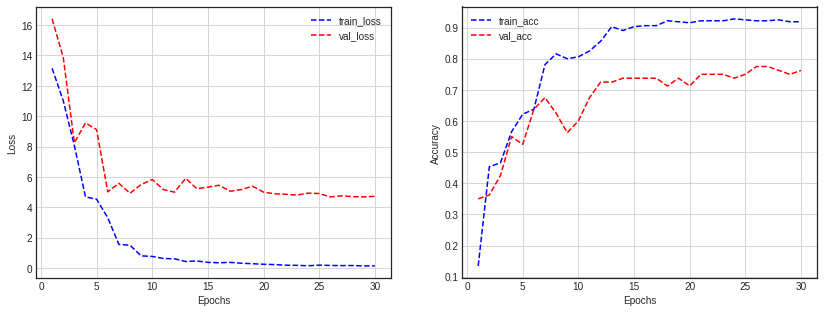

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 65ms/step - loss: 1.9566 - acc: 0.6700


[1.9566127061843872, 0.6700000166893005]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
sr

44100

In [ ]:
audio_mfcc = []
for y in audio:
    ret = librosa.feature.mfcc(y=y, sr = sr)
    audio_mfcc.append(ret)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0, flags=flags)


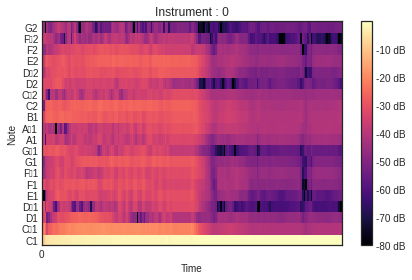

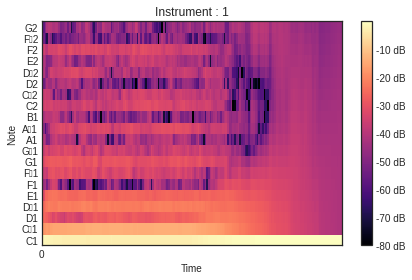

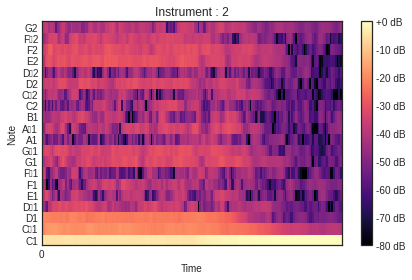

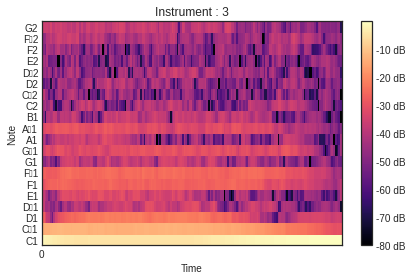

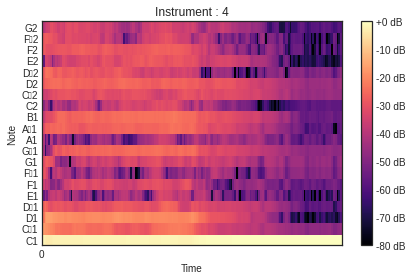

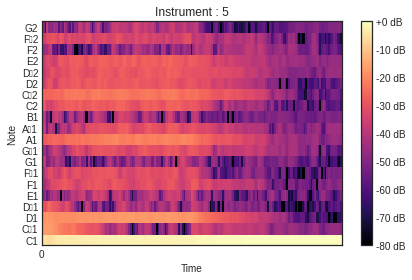

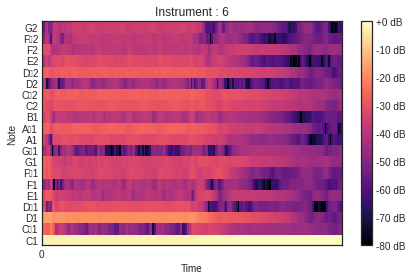

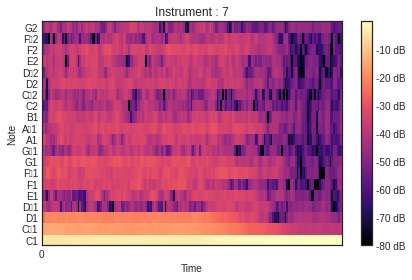

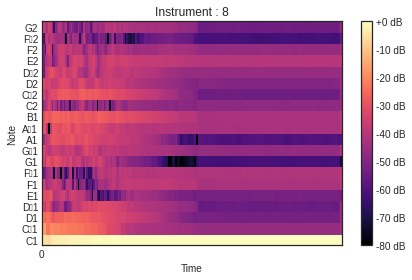

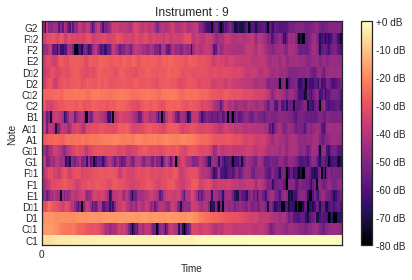

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.title(f'Instrument : {inst[i]}')
    plt.colorbar(format='%+2.0f dB')
    plt.xticks(range(0, 1))
    plt.tight_layout()
    plt.show()

In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.float32)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np = mfcc_np.reshape((500, -1))
mfcc_np.shape

(500, 3460)



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit_transform(mfcc_np)

array([[0.92910683, 0.8707374 , 0.7570002 , ..., 0.42734694, 0.40927017,
        0.4571967 ],
       [0.93212867, 0.8703929 , 0.7462225 , ..., 0.52558196, 0.5364157 ,
        0.60458684],
       [0.92653716, 0.8643894 , 0.7376123 , ..., 0.6578866 , 0.6513903 ,
        0.6879597 ],
       ...,
       [0.7476819 , 0.7700705 , 0.76901066, ..., 0.479849  , 0.48364168,
        0.55211633],
       [0.75629556, 0.7750502 , 0.7683562 , ..., 0.44972703, 0.42777264,
        0.48553336],
       [0.7696911 , 0.78214276, 0.7721504 , ..., 0.52686054, 0.53783005,
        0.5690744 ]], dtype=float32)

* 학습 데이터와 실험 데이터를 분리

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460)
(100, 3460)
(400,)
(100,)


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 


DT = DecisionTreeClassifier() 
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y) 
print(acc)

0.69


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

In [ ]:
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical 

mel_np = np.array(audio_mfcc, np.float32)
mel_array = np.expand_dims(mel_np, -1)
inst_cat = to_categorical(inst_np) # one hot vector로 변환

train_x, test_x, train_y, test_y = train_test_split(mel_array, inst_cat, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential 
from keras.layers import Input, Dense, Flatten

model = Sequential()

model.add(Flatten(input_shape=(20, 173)))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(10, activation ='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3460)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               886016    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 920,202
Trainable params: 920,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 1s 102ms/step - loss: 803.3751 - acc: 0.1063 - val_loss: 1448.9352 - val_acc: 0.1125
Epoch 2/30
3/3 [==============================] - 0s 32ms/step - loss: 1415.3010 - acc: 0.1875 - val_loss: 1876.8248 - val_acc: 0.1250
Epoch 3/30
3/3 [==============================] - 0s 26ms/step - loss: 1536.9849 - acc: 0.1688 - val_loss: 1512.4916 - val_acc: 0.1750
Epoch 4/30
3/3 [==============================] - 0s 26ms/step - loss: 1095.8127 - acc: 0.2188 - val_loss: 855.9835 - val_acc: 0.2250
Epoch 5/30
3/3 [==============================] - 0s 27ms/step - loss: 607.8987 - acc: 0.3375 - val_loss: 641.6732 - val_acc: 0.2375
Epoch 6/30
3/3 [==============================] - 0s 27ms/step - loss: 476.7240 - acc: 0.3344 - val_loss: 683.0267 - val_acc: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 26ms/step - loss: 415.0467 - acc: 0.3313 - val_loss: 436.8980 - val_acc: 0.2750
Epoch 8/30
3/3 [==============================] - 0s 26ms/step

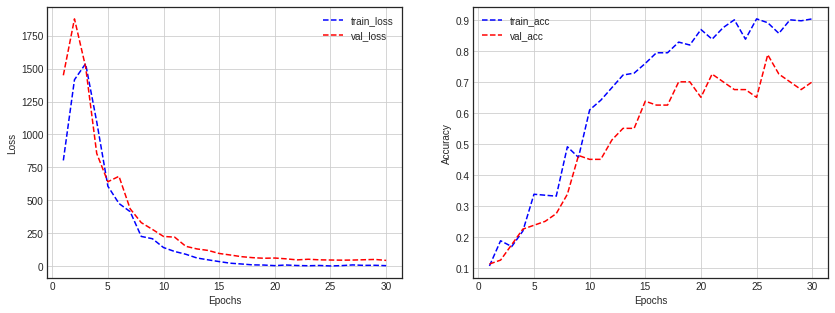

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 29.0837 - acc: 0.7600


[29.083654403686523, 0.7599999904632568]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
print(train_x.shape)

(400, 20, 173, 1)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

input_shape = 20, 173, 1

model = Sequential([
  layers.Input(shape = input_shape),
  layers.Conv2D(32, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Conv2D(64, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Conv2D(128, 3, activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), padding='same'),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 171, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 86, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 84, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 42, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 40, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 20, 128)      

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(train_x, train_y, epochs = 30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 580ms/step - loss: 16.7498 - acc: 0.1250 - val_loss: 17.0171 - val_acc: 0.1375
Epoch 2/30
3/3 [==============================] - 2s 487ms/step - loss: 12.2968 - acc: 0.0906 - val_loss: 4.0656 - val_acc: 0.1500
Epoch 3/30
3/3 [==============================] - 2s 495ms/step - loss: 3.6492 - acc: 0.1281 - val_loss: 2.9572 - val_acc: 0.0750
Epoch 4/30
3/3 [==============================] - 2s 497ms/step - loss: 2.6449 - acc: 0.1469 - val_loss: 2.3323 - val_acc: 0.1000
Epoch 5/30
3/3 [==============================] - 2s 490ms/step - loss: 2.2330 - acc: 0.1875 - val_loss: 2.2975 - val_acc: 0.1000
Epoch 6/30
3/3 [==============================] - 2s 493ms/step - loss: 2.1871 - acc: 0.2000 - val_loss: 2.2083 - val_acc: 0.2375
Epoch 7/30
3/3 [==============================] - 2s 497ms/step - loss: 2.0647 - acc: 0.2906 - val_loss: 2.1302 - val_acc: 0.2250
Epoch 8/30
3/3 [==============================] - 2s 497ms/step - loss: 1.9493 - acc: 0

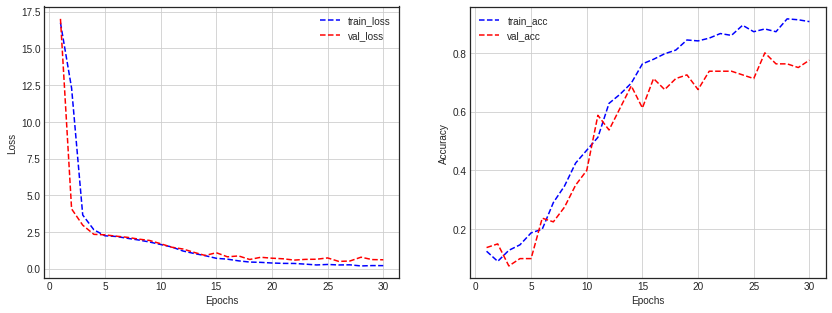

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 31ms/step - loss: 0.3157 - acc: 0.8500


[0.3157031238079071, 0.8500000238418579]